In [2]:
import numpy as mp
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN

In [3]:
data = pd.read_csv('data/Car_sales.csv')
data.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [9]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


working with duplicates

In [7]:
data.duplicated().sum()

np.int64(0)

working with NaN

In [8]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

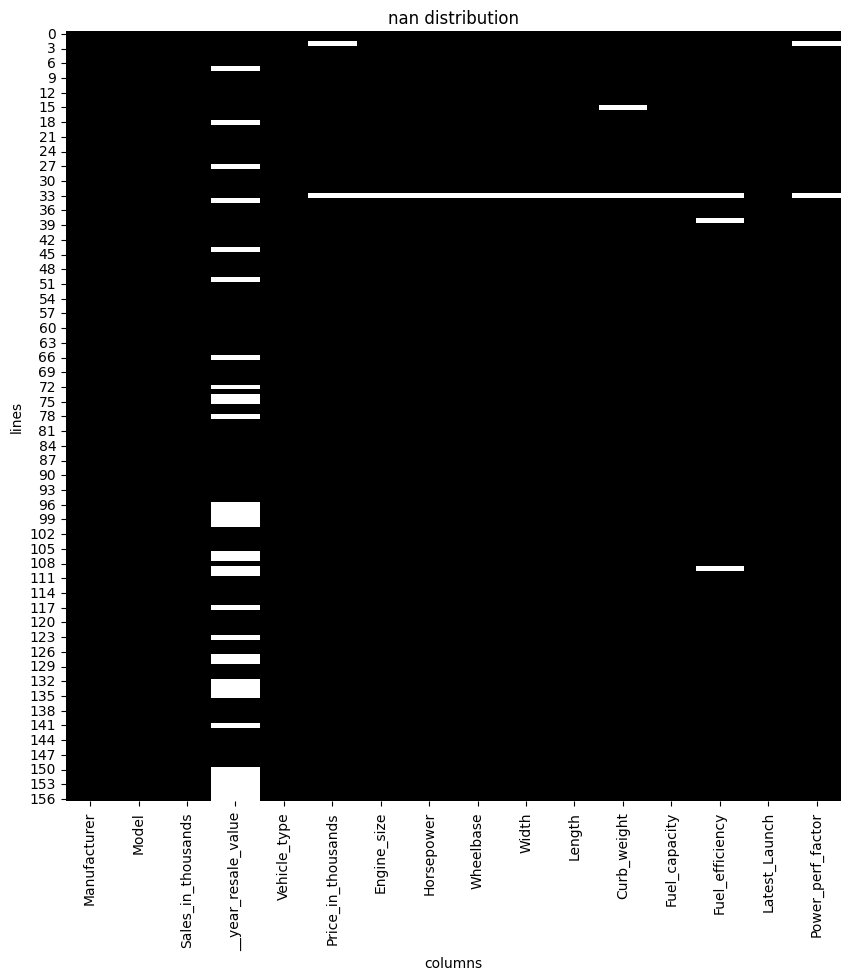

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cmap=sns.color_palette(['black', 'white']), cbar=False)
plt.xlabel('columns')
plt.ylabel('lines')
plt.title('nan distribution')
plt.show()

In [22]:
data[data.isnull().sum(axis=1)>4]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
33,Chrysler,Town & Country,53.48,19.54,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


In [23]:
data = data[data.isnull().sum(axis=1)<4]

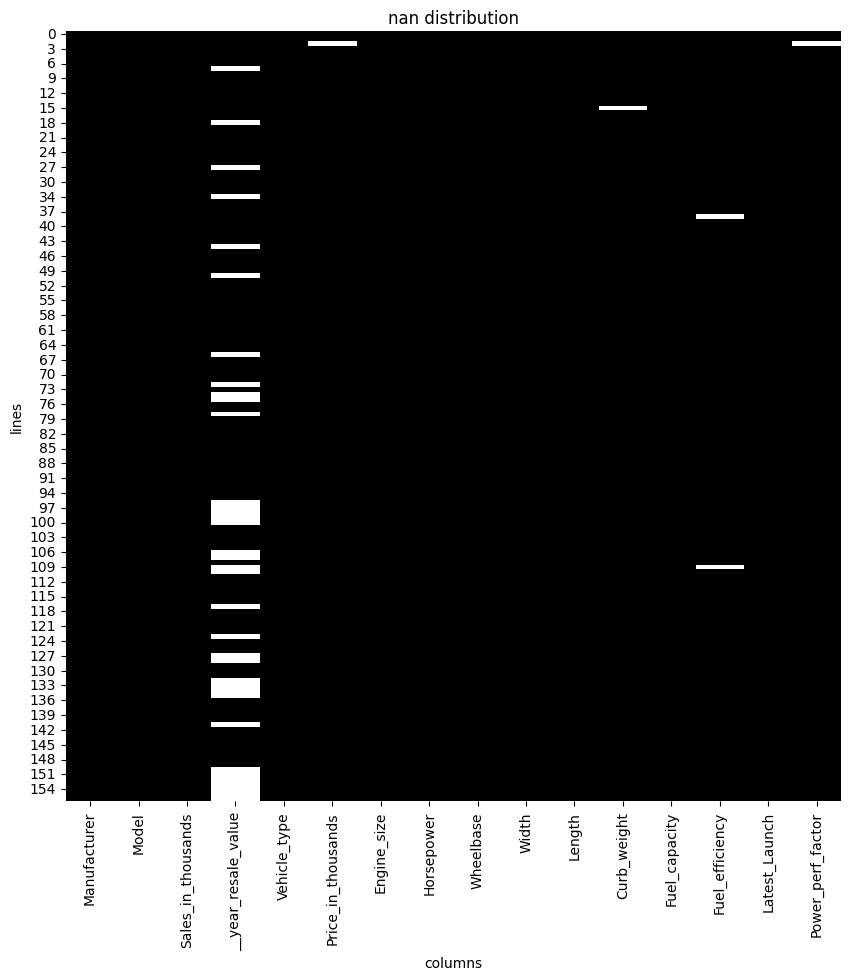

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cmap=sns.color_palette(['black', 'white']), cbar=False)
plt.xlabel('columns')
plt.ylabel('lines')
plt.title('nan distribution')
plt.show()

In [27]:
data['__year_resale_value'].median()

np.float64(14.094999999999999)

<Axes: ylabel='__year_resale_value'>

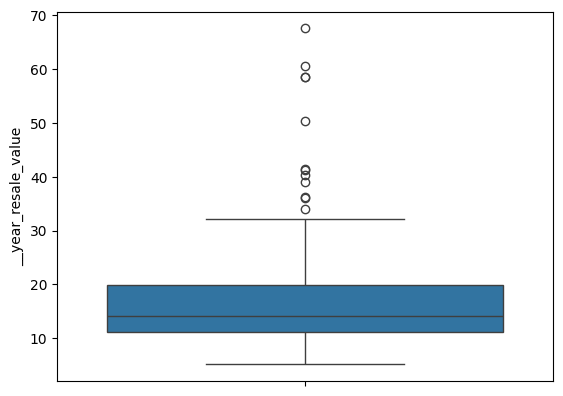

In [25]:
data['__year_resale_value'].fillna(data['__year_resale_value'].median(), inplace=True)